# Lab Assignment 1

## 1. Neural Network Hyperparameters

### Part (a)

#### Import dataset

In [2]:
# Import dataset
from sklearn.datasets import fetch_covtype

dataset = fetch_covtype()
x = dataset.data
y = dataset.target

In [4]:
# Set seed state
seed_state = 1

# Set constants
_SIGMOID = 'logistic'
_RELU = 'relu'
_TANH = 'tanh'

#### Get 70/30 training/test data split

In [5]:
# Function to standardize dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def get_standardized_dataset(x, y, train_size):
    x_train, x_test, y_train, y_test  = train_test_split(x, y, train_size = train_size, random_state = seed_state)
    standard_scaler = StandardScaler()
    standard_scaler.fit(x_train)
    return standard_scaler.transform(x_train), standard_scaler.transform(x_test), y_train, y_test

In [6]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
def mlp_model(x_train, y_train, activation_function, hidden_layer, epochs):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=ConvergenceWarning)
        print("Training model with hyperparameters - Activation function: %s,  neurons in each hidden layer: %s, number of epochs: %d" % (activation_function, str(hidden_layer), epochs))
        model = MLPClassifier(activation = activation_function, hidden_layer_sizes = hidden_layer, max_iter = epochs, random_state = seed_state)
        model.fit(x_train, y_train)
        return model

In [7]:
x_train, x_test, y_train, y_test = get_standardized_dataset(x, y, 0.7)

In [8]:
activation_functions = [_SIGMOID, _RELU, _TANH]
hidden_layers = [[20, 20],[20, 20, 20],[20, 20, 20, 20]]
number_of_epochs = 20
models = {}

#### Training 9 neural networks

In [9]:
from sklearn.neural_network import MLPClassifier
for activation_function in activation_functions:
    for hidden_layer in hidden_layers:
        models[(activation_function, str(hidden_layer))] = mlp_model(x_train, y_train, activation_function, hidden_layer, number_of_epochs)

Training model with hyperparameters - Activation function: logistic,  neurons in each hidden layer: [20, 20], number of epochs: 20
Training model with hyperparameters - Activation function: logistic,  neurons in each hidden layer: [20, 20, 20], number of epochs: 20
Training model with hyperparameters - Activation function: logistic,  neurons in each hidden layer: [20, 20, 20, 20], number of epochs: 20
Training model with hyperparameters - Activation function: relu,  neurons in each hidden layer: [20, 20], number of epochs: 20
Training model with hyperparameters - Activation function: relu,  neurons in each hidden layer: [20, 20, 20], number of epochs: 20
Training model with hyperparameters - Activation function: relu,  neurons in each hidden layer: [20, 20, 20, 20], number of epochs: 20
Training model with hyperparameters - Activation function: tanh,  neurons in each hidden layer: [20, 20], number of epochs: 20
Training model with hyperparameters - Activation function: tanh,  neurons i

#### Model evaluation using accuracy and confusion matrix

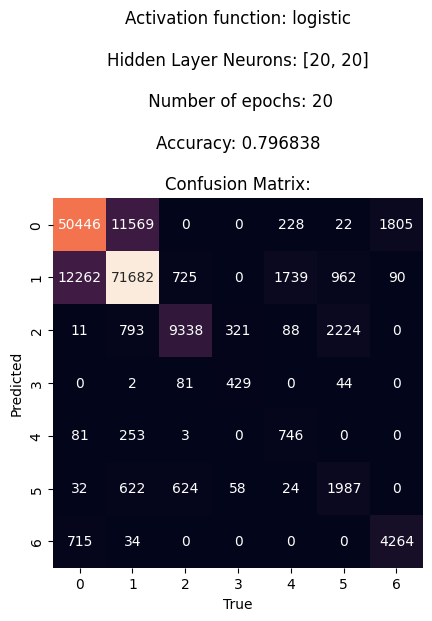

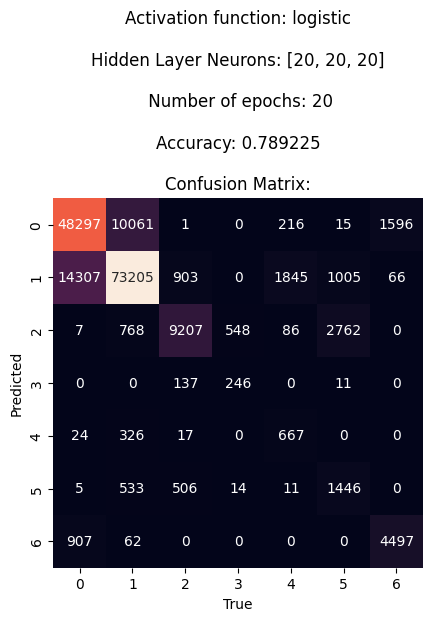

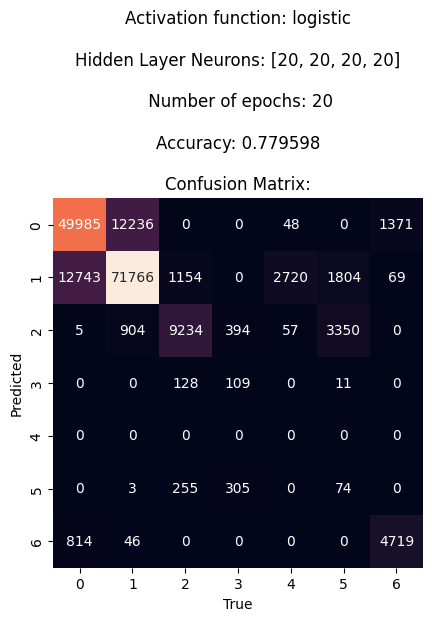

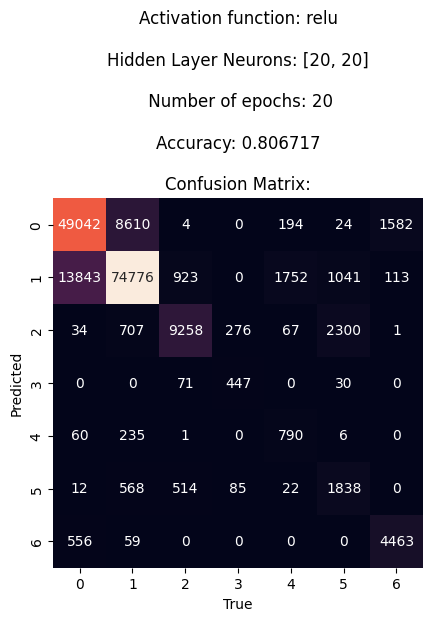

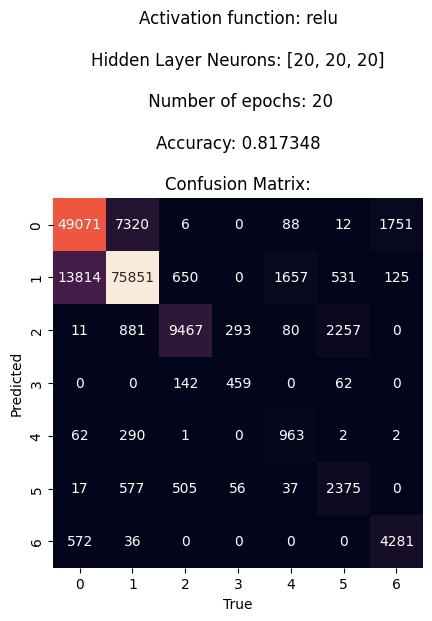

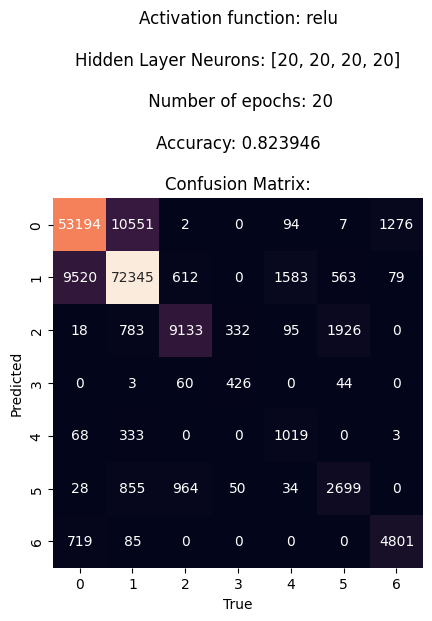

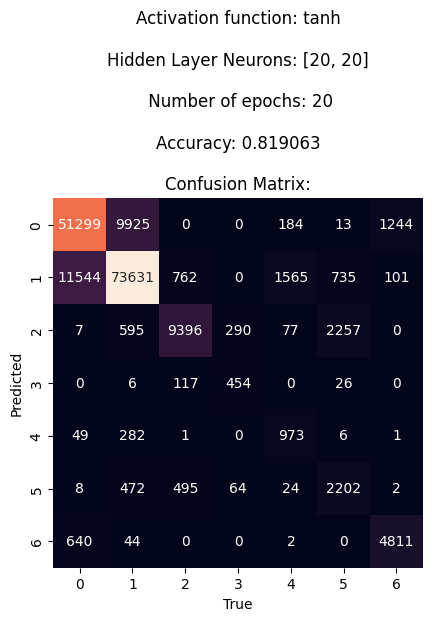

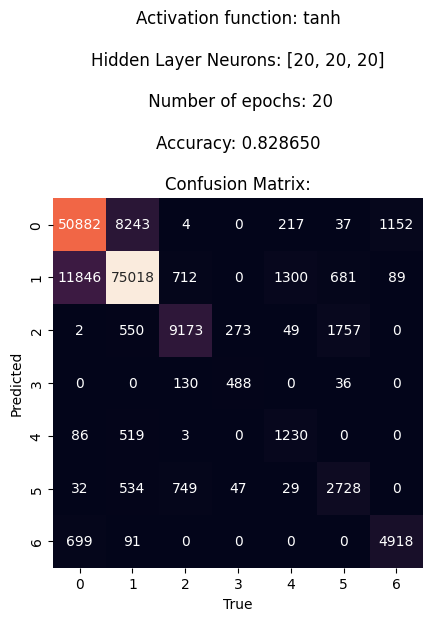

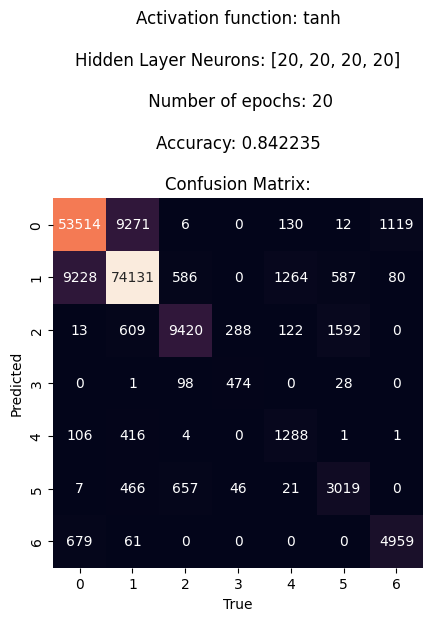

In [10]:
import seaborn
from sklearn import metrics
import matplotlib.pyplot as plt
for hyperparameters, model in models.items():
    y_test_predicted = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_predicted)
    axes = plt.axes()
    axes.set_title("Activation function: %s\n\nHidden Layer Neurons: %s\n\n Number of epochs: %d\n\nAccuracy: %f\n\nConfusion Matrix:" % (hyperparameters[0], hyperparameters[1], number_of_epochs, metrics.accuracy_score(y_test,y_test_predicted)))
    seaborn.heatmap(confusion_matrix.T, square = True, annot = True, fmt = 'd', cbar = False, ax = axes)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()

## 2. Impact of training duration and training data
### Part (a)
#### Load dataset and split it as mentioned

In [11]:
x_train, x_test, y_train, y_test = get_standardized_dataset(x, y, 0.7)
training_sizes = [x / 10 for x in range(2,10,2)]
dataset_splits = {}
for training_size in training_sizes:
    temp_x_train, _, temp_y_train, __ = train_test_split(x_train, y_train, train_size = training_size, random_state = seed_state)
    dataset_splits[training_size] = {}
    dataset_splits[training_size]['dataset'] = (temp_x_train, temp_y_train)
dataset_splits[1.0] = {}
dataset_splits[1.0]['dataset'] = (x_train, y_train)


#### Train the models with 20%, 40%, 60%, 80% and 100% of the training data respectively

In [12]:
_HIDDEN_LAYER = [20, 20, 20, 20]
_EPOCHS = list(range(10, 101, 10))
for training_size, params in dataset_splits.items():
    params['models'] = []
    for epoch in _EPOCHS:
        params['models'].append(mlp_model(params['dataset'][0], params['dataset'][1], _TANH, _HIDDEN_LAYER, epoch))

Training model with hyperparameters - Activation function: tanh,  neurons in each hidden layer: [20, 20, 20, 20], number of epochs: 10
Training model with hyperparameters - Activation function: tanh,  neurons in each hidden layer: [20, 20, 20, 20], number of epochs: 20
Training model with hyperparameters - Activation function: tanh,  neurons in each hidden layer: [20, 20, 20, 20], number of epochs: 30
Training model with hyperparameters - Activation function: tanh,  neurons in each hidden layer: [20, 20, 20, 20], number of epochs: 40
Training model with hyperparameters - Activation function: tanh,  neurons in each hidden layer: [20, 20, 20, 20], number of epochs: 50
Training model with hyperparameters - Activation function: tanh,  neurons in each hidden layer: [20, 20, 20, 20], number of epochs: 60
Training model with hyperparameters - Activation function: tanh,  neurons in each hidden layer: [20, 20, 20, 20], number of epochs: 70
Training model with hyperparameters - Activation functi

#### Calculate accuracies for all 50 models

In [13]:
for training_size, params in dataset_splits.items():
    params['accuracy'] = []
    for model in params['models']:
        y_test_predicted = model.predict(x_test)
        params['accuracy'].append(metrics.accuracy_score(y_test,y_test_predicted))
accuracies = [params['accuracy'] for index, params in dataset_splits.items()]

#### Plot the graph of accuracy over number of epochs for all five sets of training data

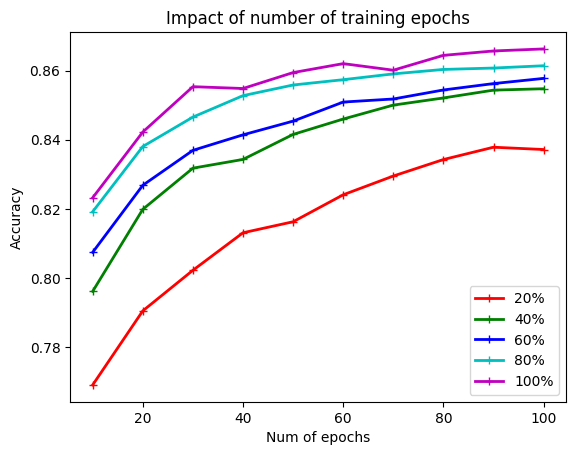

In [14]:
colours = ["r-+","g-+","b-+","c-+","m-+"]
fig, ax = plt.subplots()
for i in range(5):
    plt.plot(list(range(10,101,10)), accuracies[i], colours[i], linewidth = 2, label='Inline label' + str(i))
    ax.legend(["20%", "40%", "60%", "80%", "100%"])
plt.xlabel("Num of epochs")
plt.ylabel("Accuracy")
plt.title("Impact of number of training epochs")
plt.show()